# Naive Bayes classifiers

## Naive Bayes with categorical feature from scratch

The features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.
We aim at modeling the data distribution with a best-fit multinomial distribution.

In [1]:
"""

First let us design a simple dataset taking into account weather related features:
    - outlook in {'sunny', 'overcast', 'rainy'}
    - temp: level of temperature {'hot','cool','mild'}
    - humidity: level of humidity {'high', 'normal'}
    - windy: either it is windy are not {'yes','no'}
Then we aim at predicting either a tennis match can be played or not. "play" in {'yes','no'}.


"""
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

outlook=['sunny', 'overcast', 'rain']
temperature=['hot', 'mild', 'cold']
humidity=['high', 'normal']
wind=['yes', 'no']
play=['yes', 'no']

dataset=[["outlook", "temp", "humidity", "windy", "play"],
    ["sunny", "hot", "high", "no", "no"],
    ["sunny", "hot", "high", "yes", "no"],
    ["overcast", "hot", "high", "no", "yes"],
    ["rainy", "mild", "high", "no", "yes"],
    ["rainy", "cool", "normal", "no", "yes"],
    ["rainy", "cool", "normal", "yes", "no"],
    ["overcast", "cool", "normal", "yes", "yes"],
    ["sunny", "mild", "high", "no", "no"],
    ["sunny", "cool", "normal", "no", "yes"],
    ["rainy", "mild", "normal", "no", "yes"],
    ["sunny", "mild", "normal", "yes", "yes"],
    ["overcast", "mild", "high", "yes", "yes"],
    ["overcast", "hot", "normal", "no", "yes"],
    ["rainy", "mild", "high", "yes", "no"]]

df = pd.DataFrame(dataset[1:], columns=dataset[0])
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


 [To do Students]: Complete the following functions

In [49]:
def prior_probability(play_outcome):
    """
    input:
        - play_outcome: string taking values in ['yes','no']
    output:
        - prior probability P(play = play_outcome)
    """
    m = 0
    for i in df['play']:
        if i==play:
            m += 1
    return m/len(df['play'])
def likelihood(feature_name, feature_value, play_outcome):
    """
    inputs:
        feature_name: string with values in df column names
        feature_value: given value of the variable corresponding to feature_name
        play_outcome: outcome of target variable "play"
    output:
        Compute the conditional probability P(feature_name = feature_value|play= play_outcome)
    """
    m=0
    for i, j in zip(df[feature_name],df['play']):
        if j == play and i == feature_value:
            m += 1
    return m/len(df['play'])
def predict_play_outcome(outlook,temp,humidity,windy):
    """
    inputs:
        outlook: value of outlook for a given observation
        temp: value of outlook for a given observation
        humidity: value of outlook for a given observation
        windy: value of outlook for a given observation
    Outputs:
        predicted label by multinomial naive bayes for the given observation (outlook,temp,humidity,windy)
"""
    # Get the outcome prob for the the yes and no cases. Likelyhood* prior prob 
    P_yes= likelihood(['outlook', 'temp', 'humidity', 'windy'], df.iloc[:,:-1], df.iloc[:,4:]) * prior_probability(df.iloc[:,4:])
    P_no= likelihood(['outlook', 'temp', 'humidity', 'windy'], df.iloc[:,:-1], df.iloc[:,4:]) * prior_probability(df.iloc[:,4:])
    if P_yes >= 0.5:
        return 'yes'
    else:
        return 'no'
predict_play_outcome('sunny', 'cool', 'high', 'yes')


'no'

## The same using sklearn library

All features are categorical, we need to use Multinomial Naive Bayes.

* Step 1: encode the feature in categories (MultinomialNB doesn't work with string)
* Step 2: fit MultinomialNB
* Step 3: predict with MultinomialNB

In [3]:
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

# fit_transform the dataset
df_enc = df.apply(lambda col: le.fit_transform(col))
df_enc.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


[To do Students]:
- Learn multinomial Naive Bayes using sklearn without and with Laplace smoothing. Plus detail available model hyperparameters of the sklearn implementation.
- Compare predicted probabilities and label on df_test
- Design an example to highlight importance of Laplace smoothing.


In [4]:
# 1. import
from sklearn.naive_bayes import MultinomialNB

# 2. instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [5]:
# Build new item for prediction
df_test = pd.DataFrame(data=[['sunny', 'cool', 'high', 'yes']],
                    columns=['outlook', 'temp', 'humidity', 'windy'])

# fit_transform the dataset
df_test_enc = df_test.apply(lambda col: le.fit_transform(col))
df_test_enc.head()

,outlook,temp,humidity,windy
0,0,0,0,0


In [6]:
# Fit the model (Multinomial)
fitted_model = nb.fit(df_enc.iloc[:,:4],df_enc.iloc[:,4:5])

# fitted_model.tr
# df_enc.iloc[:,4:5]

C:\Users\hadik\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [7]:
# get the prediction
y_pred = fitted_model.predict(df_test_enc)
y_pred

array([1])

## Multinomial Naive Bays: text classification


One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [8]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories, and download the training and testing set:

In [9]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the well-known TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

With this pipeline, we can apply the model to the training data, and predict labels for the test data:

In [12]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator.
For example, here is the confusion matrix between the true and predicted labels for the test data:

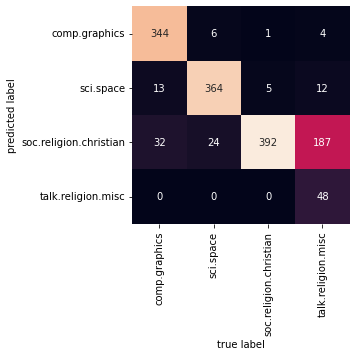

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [14]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [15]:
predict_category('sending a payload to the ISS')

'sci.space'

In [16]:
predict_category('determining the screen resolution')

'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## Naive Bayes with continuous data from scratch

For continuous data we assume the conditional probabilities P(X|Y) to follow gaussian distributions. 

In [17]:
''' Define the dataset '''
import numpy as np

Yes=[25.2,19.3,18.5,21.7,20.1,24.3,22.8,23.1,19.8]
No=[27.3,30.1,17.4,29.5,15.1]

[TO DO STUDENTS]

- Implement the computation of first and second moments of the continuous feature for each class.
- Implement the computation of the posterior probability P(Y|X)

In [39]:
from scipy import stats

In [27]:
# first moment 
np.mean(Yes) , np.mean(No)

(21.644444444444446, 23.880000000000003)

In [28]:
# Second moment 
np.var(Yes), np.var(No)

(4.924691358024691, 40.20960000000001)

In [44]:
# Or using the stats library 

print("\n1st moment for Yes :", stats.moment(Yes, moment = 1))
print("\n1st moment for No :", stats.moment(No, moment = 1))  

print("\n2nd moment for Yes :", stats.moment(Yes, moment = 2))
print("\n2nd moment for No :", stats.moment(No, moment = 2))  
# print("\n9th moment : \n", stats.moment(arr1, moment = 9, axis = None))


1st moment for Yes : 0.0

1st moment for No : 0.0

2nd moment for Yes : 4.924691358024691

2nd moment for No : 40.20960000000001


In [71]:
''' Calculate the posterior probability P(Y|X) '''
# it is equal to nb(Y)/nb(Y)+nb(X)
def P(x, y=True):
    posterior_probability = len(x)/(len(x)+len(y))
    return posterior_probability

In [72]:
P(No, Yes) , P(Yes,No)

(0.35714285714285715, 0.6428571428571429)

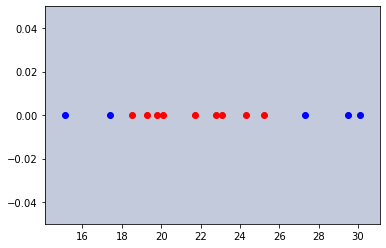

In [97]:
''' Plot the boundaries '''
import matplotlib.pyplot as plt
import math
%matplotlib inline

x_min, x_max = min(Yes+No)-1, max(Yes+No)+1

plt.plot(Yes, np.zeros_like(Yes),'ro')
plt.plot(No, np.zeros_like(No),'bo')

xx=np.linspace(x_min,x_max,100)
# get zz and fix the if statement
zz=[1 if P(Yes, No)>=P(No, Yes) else 0 for x in xx]

plt.contourf(xx, [-0.05, 0.05], [zz, zz], alpha=0.3);


## Naive Bayes with continous using sklearn library

Data are continous, we use Gaussian Naive Bayes

In [99]:
from sklearn.naive_bayes import GaussianNB

X = np.array([Yes + No]).reshape(-1, 1)
y = [1]*len(Yes)+[0]*len(No)

"""
[TO DO STUDENTS]
Learn a Gaussian Naive Bayes classifier using sklearn implementation on this data (X,y)
"""
# Initialize the Gaussian Naive Bayes
clf = GaussianNB(priors=None, var_smoothing=-0.08)
# fit the model
fitted_model = clf.fit(X, y)

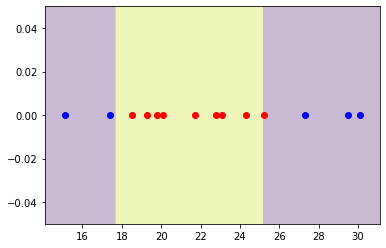

In [101]:
xx=np.linspace(x_min,x_max,1000).reshape(-1, 1)
zz = fitted_model.predict(xx).tolist()

plt.plot(Yes, np.zeros_like(Yes),'ro')
plt.plot(No, np.zeros_like(No),'bo')
plt.contourf(xx.ravel().tolist(), [-0.05, 0.05], [zz, zz], alpha=0.3);